In [7]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
# Checking GPU
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


In [4]:
DATASET_PATH = r"D:\USTH\Year 3\Computer Vision\Project\Dataset"

In [5]:
# Da dang dataset
datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range =20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

In [8]:
train_data = datagen.flow_from_directory(
    os.path.join(DATASET_PATH,"train"),
    target_size = (224,224),
    batch_size = 32,
    class_mode ='categorical'
)

Found 28709 images belonging to 7 classes.


In [9]:
val_data = datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "test"),
    target_size = (224,224),
    batch_size =32,
    class_mode = 'categorical'
)

Found 7178 images belonging to 7 classes.


In [10]:
base_model = EfficientNetB0(weights= 'imagenet', include_top = False, input_shape=(224,224,3))
base_model.trainable = False # Freeze pre-trained layer

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [12]:
#Add fully connected Layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x) #Avoid Overfitting
output = layers.Dense(7, activation= 'softmax')(x) # 7 emotions class

model = models.Model(inputs = base_model.input, outputs = output)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#Training model
history = model.fit(
    train_data,
    validation_data = val_data,
    epochs = 10,
    batch_size = 32
)

d:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2311 - loss: 1.8499

d:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 1859s 2s/step - accuracy: 0.2312 - loss: 1.8499 - val_accuracy: 0.2471 - val_loss: 1.8150
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1436s 2s/step - accuracy: 0.2512 - loss: 1.8188 - val_accuracy: 0.2471 - val_loss: 1.8137
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1375s 2s/step - accuracy: 0.2504 - loss: 1.8161 - val_accuracy: 0.2471 - val_loss: 1.8162
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1390s 2s/step - accuracy: 0.2545 - loss: 1.8166 - val_accuracy: 0.2471 - val_loss: 1.8132
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1297s 1s/step - accuracy: 0.2522 - loss: 1.8125 - val_accuracy: 0.2471 - val_loss: 1.8148
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 997s 1s/step - accuracy: 0.2515 - loss: 1.8116 - val_accuracy: 0.2471 - val_loss: 1.8138
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 1008s 1s/step - accuracy: 0.2425 - loss: 1.8146 - val_accuracy: 0.2471 - val_loss: 1.8136
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 989s 1s/step - accuracy: 0.2471 - loss: 1.8108 - val_accuracy:

In [15]:
test_loss, test_acc = model.evaluate(val_data)
print("Test Accuracy:", test_acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 194s 863ms/step - accuracy: 0.2487 - loss: 1.8133
Test Accuracy: 0.24714405834674835


In [16]:
model.save('emotion_recognition_model.h5')


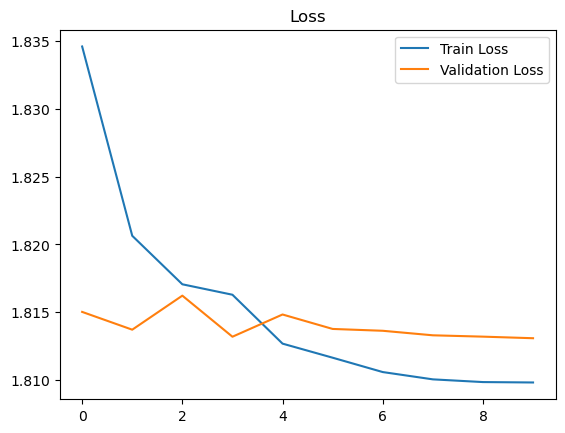

In [17]:
#Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

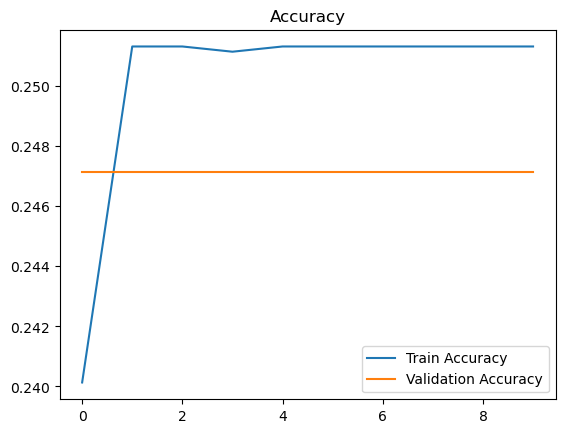

In [18]:
#Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_emotion(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
    return emotion_classes[np.argmax(predictions)]

# Ví dụ dự đoán
img_path = "path_to_sample_image.jpg"  # Thay bằng đường dẫn ảnh cụ thể
predicted_emotion = predict_emotion(img_path)
print("Predicted Emotion:", predicted_emotion)

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_sample_image.jpg'